In [1]:
from faker import Faker
import pandas as pd
import random
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('../datasets/nepali_first_name_gender.csv')

In [3]:
filename = '../datasets/lastnames.txt'
with open(filename) as f:
    content = f.readlines()
content = [x.strip()[:-1] for x in content] 

In [4]:
last_names = [x.capitalize() for x in content] 

In [5]:
first_name_male = [x.capitalize() for x in list(df[df.gender=='M'].first_name)] 
first_name_female = [x.capitalize() for x in list(df[df.gender=='F'].first_name)]

In [6]:
[random.choice(first_name_male) + " " + random.choice(last_names) for x in range(10)]

['Anjan Bhul',
 'Ayus Kaliraj',
 'Manish Praveen',
 'Yubaraj Kareem',
 'Bhakta Bagala',
 'Sabin Rajbansi',
 'Susshanzt Tinkari',
 'Sajit Rasaili',
 'Dipak Kahrel',
 'Sam Remimagar']

In [7]:
total_customer = 30000
male_percent = 58

male = {'name': [random.choice(first_name_male) + " " + random.choice(last_names) for x in range(int(total_customer*male_percent/100))]}
female = {'name': [random.choice(first_name_female) + " " + random.choice(last_names) for x in range(int(total_customer*(100-male_percent)/100))]}

In [8]:
df_male = pd.DataFrame(data=male)
df_male['gender'] = 'Male'
df_female = pd.DataFrame(data=female)
df_female['gender'] = 'Female'

In [9]:
df = df_male.append(df_female)

In [10]:
df.loc[df.sample(frac=.04).index,
    'gender'
] = 'Other'

df.loc[df.sample(frac=.02).index,
    'gender'
] = 'Prefer not to say'

In [11]:
df.gender.value_counts()

Male                 15670
Female               11145
Other                 2091
Prefer not to say     1094
Name: gender, dtype: int64

In [12]:
def email_gen(name):
    name = name.lower()
    return (name.split(' ')[0]+'.'+name.split(' ')[1]+'@fakeemail.com')

In [13]:
df['email'] = df.name.apply(email_gen)

In [14]:
df

,name,gender,email
0,Suman Chyhetri,Male,suman.chyhetri@fakeemail.com
1,Susshanzt Achrya,Male,susshanzt.achrya@fakeemail.com
2,Asutosh Awal,Male,asutosh.awal@fakeemail.com
3,Aditya Madwari,Male,aditya.madwari@fakeemail.com
4,Pradeep raj nepal Lamichahne,Male,pradeep.raj@fakeemail.com
...,...,...,...
12595,Prati Bhatt,Other,prati.bhatt@fakeemail.com
12596,Sneha Jyakhwo,Female,sneha.jyakhwo@fakeemail.com
12597,Shambhav Shai,Female,shambhav.shai@fakeemail.com
12598,Soneeya Vonjon,Female,soneeya.vonjon@fakeemail.com


In [15]:
df['phone'] = [random.randint(9841000000, 9842000000) for x in range(df.shape[0])]

In [16]:
df

,name,gender,email,phone
0,Suman Chyhetri,Male,suman.chyhetri@fakeemail.com,9841137209
1,Susshanzt Achrya,Male,susshanzt.achrya@fakeemail.com,9841064824
2,Asutosh Awal,Male,asutosh.awal@fakeemail.com,9841162884
3,Aditya Madwari,Male,aditya.madwari@fakeemail.com,9841298742
4,Pradeep raj nepal Lamichahne,Male,pradeep.raj@fakeemail.com,9841204451
...,...,...,...,...
12595,Prati Bhatt,Other,prati.bhatt@fakeemail.com,9841152214
12596,Sneha Jyakhwo,Female,sneha.jyakhwo@fakeemail.com,9841550701
12597,Shambhav Shai,Female,shambhav.shai@fakeemail.com,9841067695
12598,Soneeya Vonjon,Female,soneeya.vonjon@fakeemail.com,9841045051


In [17]:
df['channel'] = 'Word of Mouth'

In [18]:
df.loc[df.sample(frac=.5).index,
    'channel'
] = 'Facebook/Ads'

df.loc[df.sample(frac=.2).index,
    'channel'
] = 'Google Search'

df.loc[df.sample(frac=.1).index,
    'channel'
] = 'Other'

In [19]:
df

,name,gender,email,phone,channel
0,Suman Chyhetri,Male,suman.chyhetri@fakeemail.com,9841137209,Facebook/Ads
1,Susshanzt Achrya,Male,susshanzt.achrya@fakeemail.com,9841064824,Google Search
2,Asutosh Awal,Male,asutosh.awal@fakeemail.com,9841162884,Facebook/Ads
3,Aditya Madwari,Male,aditya.madwari@fakeemail.com,9841298742,Facebook/Ads
4,Pradeep raj nepal Lamichahne,Male,pradeep.raj@fakeemail.com,9841204451,Other
...,...,...,...,...,...
12595,Prati Bhatt,Other,prati.bhatt@fakeemail.com,9841152214,Word of Mouth
12596,Sneha Jyakhwo,Female,sneha.jyakhwo@fakeemail.com,9841550701,Facebook/Ads
12597,Shambhav Shai,Female,shambhav.shai@fakeemail.com,9841067695,Facebook/Ads
12598,Soneeya Vonjon,Female,soneeya.vonjon@fakeemail.com,9841045051,Facebook/Ads


In [20]:
df.channel.value_counts()

Facebook/Ads     11414
Google Search     8131
Other             5318
Word of Mouth     5137
Name: channel, dtype: int64

In [21]:
df['first_contact'] = 'app'

In [22]:
df.loc[df.sample(frac=.676).index,
    'first_contact'
] = 'browser'

In [23]:
df

,name,gender,email,phone,channel,first_contact
0,Suman Chyhetri,Male,suman.chyhetri@fakeemail.com,9841137209,Facebook/Ads,browser
1,Susshanzt Achrya,Male,susshanzt.achrya@fakeemail.com,9841064824,Google Search,browser
2,Asutosh Awal,Male,asutosh.awal@fakeemail.com,9841162884,Facebook/Ads,browser
3,Aditya Madwari,Male,aditya.madwari@fakeemail.com,9841298742,Facebook/Ads,browser
4,Pradeep raj nepal Lamichahne,Male,pradeep.raj@fakeemail.com,9841204451,Other,browser
...,...,...,...,...,...,...
12595,Prati Bhatt,Other,prati.bhatt@fakeemail.com,9841152214,Word of Mouth,browser
12596,Sneha Jyakhwo,Female,sneha.jyakhwo@fakeemail.com,9841550701,Facebook/Ads,app
12597,Shambhav Shai,Female,shambhav.shai@fakeemail.com,9841067695,Facebook/Ads,browser
12598,Soneeya Vonjon,Female,soneeya.vonjon@fakeemail.com,9841045051,Facebook/Ads,browser


In [24]:
df['first_contact'].value_counts()

browser    25780
app         4220
Name: first_contact, dtype: int64

In [25]:
df = df.sample(frac=1)

In [26]:
df

,name,gender,email,phone,channel,first_contact
8250,Kaushal Bashyal,Male,kaushal.bashyal@fakeemail.com,9841791565,Google Search,browser
10606,Sona Hayanju,Female,sona.hayanju@fakeemail.com,9841685812,Other,browser
5076,Suman Pokherel,Male,suman.pokherel@fakeemail.com,9841526187,Facebook/Ads,browser
1824,Samita Yogol,Female,samita.yogol@fakeemail.com,9841131562,Facebook/Ads,browser
6878,Mahima Marasaini,Female,mahima.marasaini@fakeemail.com,9841859344,Other,app
...,...,...,...,...,...,...
9653,Ansu Adhikary,Female,ansu.adhikary@fakeemail.com,9841430787,Facebook/Ads,browser
3735,Lune Bisht,Female,lune.bisht@fakeemail.com,9841969651,Other,browser
1387,Rohit Gajurel,Other,rohit.gajurel@fakeemail.com,9841940773,Google Search,browser
2197,Kusum J.b.rana,Female,kusum.j.b.rana@fakeemail.com,9841904502,Google Search,browser


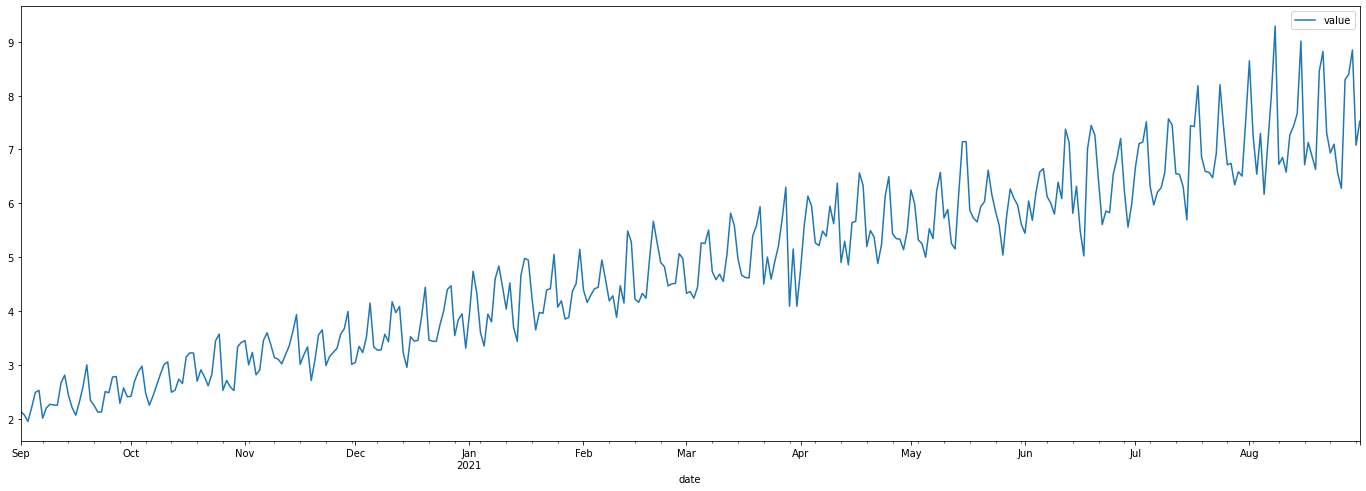

In [27]:
from timeseries_generator import LinearTrend, Generator, WhiteNoise, RandomFeatureFactor, WeekdayFactor
import pandas as pd

start="09-01-2020"
end="08-31-2021"


# setting up a linear tren
lt = LinearTrend(coef=5.0, offset=1., col_name="my_linear_trend")

weekday_factor = WeekdayFactor(
    col_name="weekend_boost_factor",
    factor_values={4: 1.1, 5: 1.2, 6: 1.2}  # Here we assign a factor of 1.1 to Friday, and 1.2 to Sat/Sun 
)

# weekday_factor.plot(start_date=start, end_date=end)

g = Generator(factors={lt, weekday_factor}, features=None, date_range=pd.date_range(start=start, end=end))
g.generate()

# update by adding some white noise to the generator
wn = WhiteNoise(stdev_factor=0.06)
g.update_factor(wn)
g.generate()
g.plot()

In [28]:
data = g.generate()

In [29]:
data['rows'] = (10*data.value).astype(int)

In [30]:
data.rows.sum()

17326

In [31]:
data

,date,base_amount,my_linear_trend,white_noise,weekend_boost_factor,total_factor,value,rows
0,2020-09-01,1.0,2.000000,1.033445,1.0,2.066891,2.066891,20
1,2020-09-02,1.0,2.013699,0.956114,1.0,1.925326,1.925326,19
2,2020-09-03,1.0,2.027397,0.906669,1.0,1.838179,1.838179,18
3,2020-09-04,1.0,2.041096,0.957273,1.1,2.149275,2.149275,21
4,2020-09-05,1.0,2.054795,0.962236,1.2,2.372637,2.372637,23
...,...,...,...,...,...,...,...,...
360,2021-08-27,1.0,6.931507,0.986548,1.1,7.522090,7.522090,75
361,2021-08-28,1.0,6.945205,0.981777,1.2,8.182375,8.182375,81
362,2021-08-29,1.0,6.958904,1.021142,1.2,8.527237,8.527237,85
363,2021-08-30,1.0,6.972603,1.005213,1.0,7.008952,7.008952,70


In [32]:
def nepali_holiday(row):
    date = datetime.datetime.strptime(str(row.date), "%Y-%m-%d %H:%M:%S")
    num = row.rows
    if date>datetime.datetime(2020, 10, 16) and date<datetime.datetime(2020, 10, 25):
        num = int (num*1.2)
    if date>datetime.datetime(2020, 12, 24) and date<datetime.datetime(2021, 1, 2):
        num = int (num*1.4)
    if date>datetime.datetime(2021, 1, 4) and date<datetime.datetime(2021, 1, 7):
        num = num - num
    if date>datetime.datetime(2021, 2, 13) and date<datetime.datetime(2021, 2, 15):
        num = int (num*1.4)
    if date>datetime.datetime(2021, 7, 1):
        num = int(num * 2)
    return num

In [33]:
data['rows'] = data.apply(nepali_holiday, axis=1)

In [34]:
# ["2020-09-01"]*100 + ["2020-09-02"] * 200
from datetime import datetime as dt
import datetime

def create_list(row):
    return [str(row.date)]*row.rows

In [35]:
final_dates = (data.apply(create_list, axis=1).sum())

In [36]:
clients = df.head(len(final_dates))
clients.reset_index(inplace = True, drop=True)

In [37]:
clients['created_at'] = final_dates

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_96046/801896566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['created_at'] = final_dates


In [38]:
clients

,name,gender,email,phone,channel,first_contact,created_at
0,Kaushal Bashyal,Male,kaushal.bashyal@fakeemail.com,9841791565,Google Search,browser,2020-09-01 00:00:00
1,Sona Hayanju,Female,sona.hayanju@fakeemail.com,9841685812,Other,browser,2020-09-01 00:00:00
2,Suman Pokherel,Male,suman.pokherel@fakeemail.com,9841526187,Facebook/Ads,browser,2020-09-01 00:00:00
3,Samita Yogol,Female,samita.yogol@fakeemail.com,9841131562,Facebook/Ads,browser,2020-09-01 00:00:00
4,Mahima Marasaini,Female,mahima.marasaini@fakeemail.com,9841859344,Other,app,2020-09-01 00:00:00
...,...,...,...,...,...,...,...
21638,Bibek Barakoti,Male,bibek.barakoti@fakeemail.com,9841288299,Facebook/Ads,browser,2021-08-31 00:00:00
21639,Ansu Huzdar,Female,ansu.huzdar@fakeemail.com,9841694532,Google Search,browser,2021-08-31 00:00:00
21640,Sumit Sanjel,Male,sumit.sanjel@fakeemail.com,9841638790,Google Search,browser,2021-08-31 00:00:00
21641,Prapti Mushyakhow,Female,prapti.mushyakhow@fakeemail.com,9841359950,Facebook/Ads,browser,2021-08-31 00:00:00


In [39]:
clients.gender.value_counts()

Male                 11306
Female                8040
Other                 1500
Prefer not to say      797
Name: gender, dtype: int64

In [40]:
clients.channel.value_counts()

Facebook/Ads     8247
Google Search    5849
Other            3827
Word of Mouth    3720
Name: channel, dtype: int64

In [41]:
clients['first_contact'].value_counts()

browser    18601
app         3042
Name: first_contact, dtype: int64

In [42]:
def random_times(input_time):
    random_hour = random.uniform(0, 23)
    return dt.strptime(input_time, "%Y-%m-%d %H:%M:%S") + datetime.timedelta(hours=random_hour)

In [43]:
clients['created_at'] = clients['created_at'].apply(random_times)

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_96046/1294208807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['created_at'] = clients['created_at'].apply(random_times)


In [44]:
clients.sort_values('created_at').reset_index(drop=True, inplace=True)

In [45]:
clients['client_id'] = clients.index + 100000000

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_96046/781864625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['client_id'] = clients.index + 100000000


In [46]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id
0,Kaushal Bashyal,Male,kaushal.bashyal@fakeemail.com,9841791565,Google Search,browser,2020-09-01 10:48:09.763278,100000000
1,Sona Hayanju,Female,sona.hayanju@fakeemail.com,9841685812,Other,browser,2020-09-01 11:46:03.489814,100000001
2,Suman Pokherel,Male,suman.pokherel@fakeemail.com,9841526187,Facebook/Ads,browser,2020-09-01 14:05:06.316626,100000002
3,Samita Yogol,Female,samita.yogol@fakeemail.com,9841131562,Facebook/Ads,browser,2020-09-01 20:56:28.775488,100000003
4,Mahima Marasaini,Female,mahima.marasaini@fakeemail.com,9841859344,Other,app,2020-09-01 16:06:58.593803,100000004
...,...,...,...,...,...,...,...,...
21638,Bibek Barakoti,Male,bibek.barakoti@fakeemail.com,9841288299,Facebook/Ads,browser,2021-08-31 21:01:37.440162,100021638
21639,Ansu Huzdar,Female,ansu.huzdar@fakeemail.com,9841694532,Google Search,browser,2021-08-31 01:11:26.657379,100021639
21640,Sumit Sanjel,Male,sumit.sanjel@fakeemail.com,9841638790,Google Search,browser,2021-08-31 20:41:11.488311,100021640
21641,Prapti Mushyakhow,Female,prapti.mushyakhow@fakeemail.com,9841359950,Facebook/Ads,browser,2021-08-31 18:17:39.263566,100021641


In [47]:
def date_gen(start, end):
    start_date = datetime.date(start, 1, 1)
    end_date = datetime.date(end, 12, 31)
    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days
    random_number_of_days = random.randrange(days_between_dates)
    random_date = start_date + datetime.timedelta(days=random_number_of_days)
    return str(random_date)

In [48]:
dob = [date_gen(1975, 1990) for x in range(clients.shape[0]//5)] + \
[date_gen(1991, 1995) for x in range(clients.shape[0]//5)] + \
[date_gen(1996, 2000) for x in range(clients.shape[0]//2)] + \
[date_gen(2001, 2005) for x in range(clients.shape[0]//2)] + \
[date_gen(2006, 2008) for x in range(clients.shape[0]//5)]

In [49]:
random.shuffle(dob)

In [50]:
clients['dob'] = dob[:clients.shape[0]]

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_96046/1825158366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['dob'] = dob[:clients.shape[0]]


In [51]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id,dob
0,Kaushal Bashyal,Male,kaushal.bashyal@fakeemail.com,9841791565,Google Search,browser,2020-09-01 10:48:09.763278,100000000,2003-03-14
1,Sona Hayanju,Female,sona.hayanju@fakeemail.com,9841685812,Other,browser,2020-09-01 11:46:03.489814,100000001,1996-07-03
2,Suman Pokherel,Male,suman.pokherel@fakeemail.com,9841526187,Facebook/Ads,browser,2020-09-01 14:05:06.316626,100000002,2005-08-04
3,Samita Yogol,Female,samita.yogol@fakeemail.com,9841131562,Facebook/Ads,browser,2020-09-01 20:56:28.775488,100000003,2001-08-22
4,Mahima Marasaini,Female,mahima.marasaini@fakeemail.com,9841859344,Other,app,2020-09-01 16:06:58.593803,100000004,1985-03-20
...,...,...,...,...,...,...,...,...,...
21638,Bibek Barakoti,Male,bibek.barakoti@fakeemail.com,9841288299,Facebook/Ads,browser,2021-08-31 21:01:37.440162,100021638,1999-10-05
21639,Ansu Huzdar,Female,ansu.huzdar@fakeemail.com,9841694532,Google Search,browser,2021-08-31 01:11:26.657379,100021639,2004-03-30
21640,Sumit Sanjel,Male,sumit.sanjel@fakeemail.com,9841638790,Google Search,browser,2021-08-31 20:41:11.488311,100021640,1997-07-11
21641,Prapti Mushyakhow,Female,prapti.mushyakhow@fakeemail.com,9841359950,Facebook/Ads,browser,2021-08-31 18:17:39.263566,100021641,2006-05-08


In [52]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id,dob
0,Kaushal Bashyal,Male,kaushal.bashyal@fakeemail.com,9841791565,Google Search,browser,2020-09-01 10:48:09.763278,100000000,2003-03-14
1,Sona Hayanju,Female,sona.hayanju@fakeemail.com,9841685812,Other,browser,2020-09-01 11:46:03.489814,100000001,1996-07-03
2,Suman Pokherel,Male,suman.pokherel@fakeemail.com,9841526187,Facebook/Ads,browser,2020-09-01 14:05:06.316626,100000002,2005-08-04
3,Samita Yogol,Female,samita.yogol@fakeemail.com,9841131562,Facebook/Ads,browser,2020-09-01 20:56:28.775488,100000003,2001-08-22
4,Mahima Marasaini,Female,mahima.marasaini@fakeemail.com,9841859344,Other,app,2020-09-01 16:06:58.593803,100000004,1985-03-20
...,...,...,...,...,...,...,...,...,...
21638,Bibek Barakoti,Male,bibek.barakoti@fakeemail.com,9841288299,Facebook/Ads,browser,2021-08-31 21:01:37.440162,100021638,1999-10-05
21639,Ansu Huzdar,Female,ansu.huzdar@fakeemail.com,9841694532,Google Search,browser,2021-08-31 01:11:26.657379,100021639,2004-03-30
21640,Sumit Sanjel,Male,sumit.sanjel@fakeemail.com,9841638790,Google Search,browser,2021-08-31 20:41:11.488311,100021640,1997-07-11
21641,Prapti Mushyakhow,Female,prapti.mushyakhow@fakeemail.com,9841359950,Facebook/Ads,browser,2021-08-31 18:17:39.263566,100021641,2006-05-08


In [53]:
location = pd.read_csv("../datasets/location.csv")

In [54]:
location = location[['lat', 'lon', 'name']]

In [55]:
location_list =  [location.sample().values.tolist() for x in range(clients.shape[0])]

In [56]:
location_df = pd.DataFrame(location_list)

In [57]:
location_df

,0
0,"[27.7768, 85.3622, Golfutar Main Rd]"
1,"[27.6954, 85.3447, ACE Institute Of Management]"
2,"[27.659, 85.368, Changathali Rd]"
3,"[27.7126, 85.283, Ring Road]"
4,"[27.7137, 85.3245, Bhagawati Marg]"
...,...
21638,"[27.6787, 85.3103, Jhamsikhel Marg]"
21639,"[27.7305, 85.3405, Banshidhar Marg]"
21640,"[27.7206, 85.3194, Kumari Mai Marg]"
21641,"[27.7351, 85.3056, Gongabu New Buspark]"


In [58]:
location_df[['lat','lon', 'location_name']] = pd.DataFrame(location_df[0].tolist(), index= location_df.index)

In [59]:
location_df[['lat', 'lon', 'location_name']]

,lat,lon,location_name
0,27.7768,85.3622,Golfutar Main Rd
1,27.6954,85.3447,ACE Institute Of Management
2,27.6590,85.3680,Changathali Rd
3,27.7126,85.2830,Ring Road
4,27.7137,85.3245,Bhagawati Marg
...,...,...,...
21638,27.6787,85.3103,Jhamsikhel Marg
21639,27.7305,85.3405,Banshidhar Marg
21640,27.7206,85.3194,Kumari Mai Marg
21641,27.7351,85.3056,Gongabu New Buspark


In [60]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id,dob
0,Kaushal Bashyal,Male,kaushal.bashyal@fakeemail.com,9841791565,Google Search,browser,2020-09-01 10:48:09.763278,100000000,2003-03-14
1,Sona Hayanju,Female,sona.hayanju@fakeemail.com,9841685812,Other,browser,2020-09-01 11:46:03.489814,100000001,1996-07-03
2,Suman Pokherel,Male,suman.pokherel@fakeemail.com,9841526187,Facebook/Ads,browser,2020-09-01 14:05:06.316626,100000002,2005-08-04
3,Samita Yogol,Female,samita.yogol@fakeemail.com,9841131562,Facebook/Ads,browser,2020-09-01 20:56:28.775488,100000003,2001-08-22
4,Mahima Marasaini,Female,mahima.marasaini@fakeemail.com,9841859344,Other,app,2020-09-01 16:06:58.593803,100000004,1985-03-20
...,...,...,...,...,...,...,...,...,...
21638,Bibek Barakoti,Male,bibek.barakoti@fakeemail.com,9841288299,Facebook/Ads,browser,2021-08-31 21:01:37.440162,100021638,1999-10-05
21639,Ansu Huzdar,Female,ansu.huzdar@fakeemail.com,9841694532,Google Search,browser,2021-08-31 01:11:26.657379,100021639,2004-03-30
21640,Sumit Sanjel,Male,sumit.sanjel@fakeemail.com,9841638790,Google Search,browser,2021-08-31 20:41:11.488311,100021640,1997-07-11
21641,Prapti Mushyakhow,Female,prapti.mushyakhow@fakeemail.com,9841359950,Facebook/Ads,browser,2021-08-31 18:17:39.263566,100021641,2006-05-08


In [61]:
clients = pd.concat([clients, location_df[['lat', 'lon', 'location_name']]], axis=1)

In [62]:
list(clients)

['name',
 'gender',
 'email',
 'phone',
 'channel',
 'first_contact',
 'created_at',
 'client_id',
 'dob',
 'lat',
 'lon',
 'location_name']

In [63]:
clients[
['client_id',
 'name',
 'gender',
 'dob',
 'email',
 'phone',
 'channel',
 'first_contact',
  'lat',
 'lon',
 'location_name',
 'created_at']
].to_csv('../datasets/clients.csv', index=False)